In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [0]:
from sklearn import linear_model

In [44]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [45]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.11 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [0]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [39]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

arr_loss=[]
rounded_loss=[]

#rounded_loss.append(0.0000)
sigma=0
w_at_the_end_of_each_epoch=[]
b_at_the_end_of_each_epoch=[]

def loss_function(y_train,y_pred):
  p=-np.mean(y_train*np.log(y_pred)+(1-y_train)*np.log(1-y_pred))
  return p


for j in range(0,30): #for each epoch (30 iterations)
  y_pred=[]
  for i in range(len(X_train)): #for each point in train data
    
    z=(X_train[i].dot(w))+b
    sigma=1/(1+np.exp(-z)) #sigmoid function
    pred=sigma
    w=(1-(eta0*alpha)/N)*w+(eta0*X_train[i]*(y_train[i]-sigma)) #updting weight vector
    
    b=(b+(eta0*(y_train[i]-sigma))) #updating the intercept

    loss=loss_function(y_train[i],pred)
    y_pred.append(loss)
   
  rounded_loss.append(round(np.average(y_pred),5))
  w_at_the_end_of_each_epoch.append(w)
  b_at_the_end_of_each_epoch.append(b)
  arr_loss.append(np.average(y_pred))
  if(j>0):
    
    if(rounded_loss[j]==rounded_loss[j-1]):
      print("The number of iterations needed to find the same log loss for next epoch is:")
      print(j)
      break

print("the values for log loss at each epoch is :")
print(arr_loss)
                  
                  
                  

The number of iterations needed to find the same log loss for next epoch is:
13
the values for log loss at each epoch is :
[0.45610715612220937, 0.3946913054134686, 0.38558684615141536, 0.3820332220716334, 0.38035055342868135, 0.3794887755291076, 0.3790295733085725, 0.3787793587342117, 0.3786411532813051, 0.3785641439189919, 0.37852098163708703, 0.3784966943227099, 0.37848299250575157, 0.3784752507008752]


In [19]:
print("the optimal w for the train data is :")
print(w)

the optimal w for the train data is :
[-4.27659751e-01  1.92371836e-01 -1.47659040e-01  3.38112965e-01
 -2.18314654e-01  5.68456193e-01 -4.45219270e-01 -9.04783153e-02
  2.20587410e-01  1.72532946e-01  1.97620190e-01  3.38326141e-04
 -8.02083343e-02  3.38994084e-01  2.27134519e-02]


In [20]:

# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own

print("the optimal intercept for the train data is :")
print(b)

the optimal intercept for the train data is :
-0.878773899259335


In [25]:

eta01  = 0.0001
alpha1 = 0.0001
N = len(X_test)
arr_loss_test=[]

sigma1=0


def loss_function_test(y_test,y_pred):
  p1=-np.mean(y_test*np.log(y_pred)+(1-y_test)*np.log(1-y_pred))

  return p1

for j in range(0,14): #for each epoch (13 iterations)
  y_pred1=[]
  for i in range(len(X_test)):
    
    z=(X_test[i].dot(w_at_the_end_of_each_epoch[j]))+b_at_the_end_of_each_epoch[j]
    sigma1=1/(1+np.exp(-z))#sigmoid function
    pred1=sigma1

    loss1=loss_function_test(y_test[i],pred1)
    y_pred1.append(loss1)
   
    
  arr_loss_test.append(np.average(y_pred1))

print("log loss for the test data for each epoch using w and b of the train data at the end of each epoch:")
print(arr_loss_test)#final array of loss for each epoch

                  
                  
                  

log loss for the test data for each epoch using w and b of the train data at the end of each epoch:
[0.4051507711105075, 0.3900563342346352, 0.3850058403139176, 0.38272919624702656, 0.38158346823458406, 0.3809755312339999, 0.3806434506916482, 0.38045882555929145, 0.38035495698812244, 0.38029600513158396, 0.38026230396321115, 0.3802429117449629, 0.38023168086403236, 0.3802251317350343]


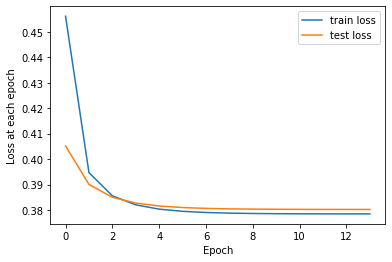

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
label=["train loss","test loss"]
plt.plot(np.arange(0,14), arr_loss[0:14])
plt.plot(np.arange(0,14), arr_loss_test[0:14])
plt.legend(label)
plt.xlabel("Epoch")
plt.ylabel("Loss at each epoch")

plt.show()

In [46]:

count=0
print("the differance between sklearn coeficient and implemented one is :")
for i in clf.coef_:
  for y in i:
    print(y-w[count])
    count=count+1
    
   

the differance between sklearn coeficient and implemented one is :
0.004292835029638842
-0.006896183813516199
-0.0009313171203083059
0.0033311044167980697
0.010127951882034664
-0.008290407341635442
-0.007205554929896996
-0.003609812786818281
-0.011314211155125542
0.008308314397246996
-0.000568284980862116
0.0038808309367270345
0.0006046383877040956
-0.0004660685286295707
-4.624238439203052e-05
